# 1. Download data

In [74]:
import os  # This allows us to work with files and directories
import urllib.request  # This helps us to download files from the internet
import tarfile  # This helps us extract files from a .tar or .tgz archive

# This is where we'll download the dataset from
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

# Path where we'll save the downloaded dataset
DESTINATION_FOLDER = "datasets/housing"

# Function to download and extract the housing data
def download_and_extract_housing_data(url=DOWNLOAD_URL, destination_folder=DESTINATION_FOLDER):
    # Step 1: Create the directory to store the data if it doesn't already exist
    os.makedirs(destination_folder, exist_ok=True)

    # Step 2: Download the file from the internet
    print("Downloading the dataset...")
    tgz_path = os.path.join(destination_folder, "housing.tgz")  # This is where the file will be saved
    urllib.request.urlretrieve(url, tgz_path)  # Downloads the file from the URL

    # Step 3: Extract the downloaded .tgz file
    print("Extracting the dataset...")
    with tarfile.open(tgz_path) as housing_tgz:  # Opens the .tgz file
        housing_tgz.extractall(destination_folder)  # Extracts the content to the folder

    print("Download and extraction complete!")

# Run the function to download and extract the data
download_and_extract_housing_data()


Extracting the dataset...
Download and extraction complete!


`.tgz` files are compressed archive files. We have to extract it

`DOWNLOAD_URL` is the link to the file we want to download (AKA the .tgz file)

`DESTINATION_FOLDER` is the location on local (Google colab in this case) where I want to save the dataset (.tgz file). Here, I saved it at `datasets/housing` path. I have to rerun this code again once runtime restarts.

`tgz_path` is needed because I need to join the path of the destination folder and the file name (in .tgz) that I want to save.

`urllib.request.urlretrieve(url, tgz_path)` can now download the .tgz file from the url and then save it at the path (the joined destination folder and file name in .tgz).

`with tarfile.open(tgz_path) as housing_tgz:` is used to open the .tgz file, and then `housing_tgz.extractall(destination_folder)` extracts the contents of the file and saves them in the destination folder.

# 2. Basic Data Exploration

## 2.1 Basic Data Description (.info(), .describe(), .value_counts())

In [75]:
import pandas as pd

def load_housing_data(destination_folder=DESTINATION_FOLDER):
    # Path to the CSV file (after extraction earlier)
    csv_path = os.path.join(destination_folder, "housing.csv")

    # Load and return the CSV file as a pandas DataFrame
    return pd.read_csv(csv_path)

# Now, you can call the function to load the data after it has been downloaded and extracted
housing_data = load_housing_data()
print(housing_data.head())  # This will print the first 5 rows of the dataset


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


`return pd.read_csv(csv_path)` will return a dataframe when given an input of a csv path, which we defined earlier by joining the destination folder path and the .csv file name that we want (`csv_path = os.path.join(destination_folder, 'housing.csv')`)

In [76]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


See that `total_bedrooms` feature has some null values (only 20433 non-null values out of a total of 20640 entries)

In [77]:
housing_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Dig into the feature using `dataframe['feature']` and use `.value_counts()` for categorical features

In [78]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2.2 Data Exploration with Histograms

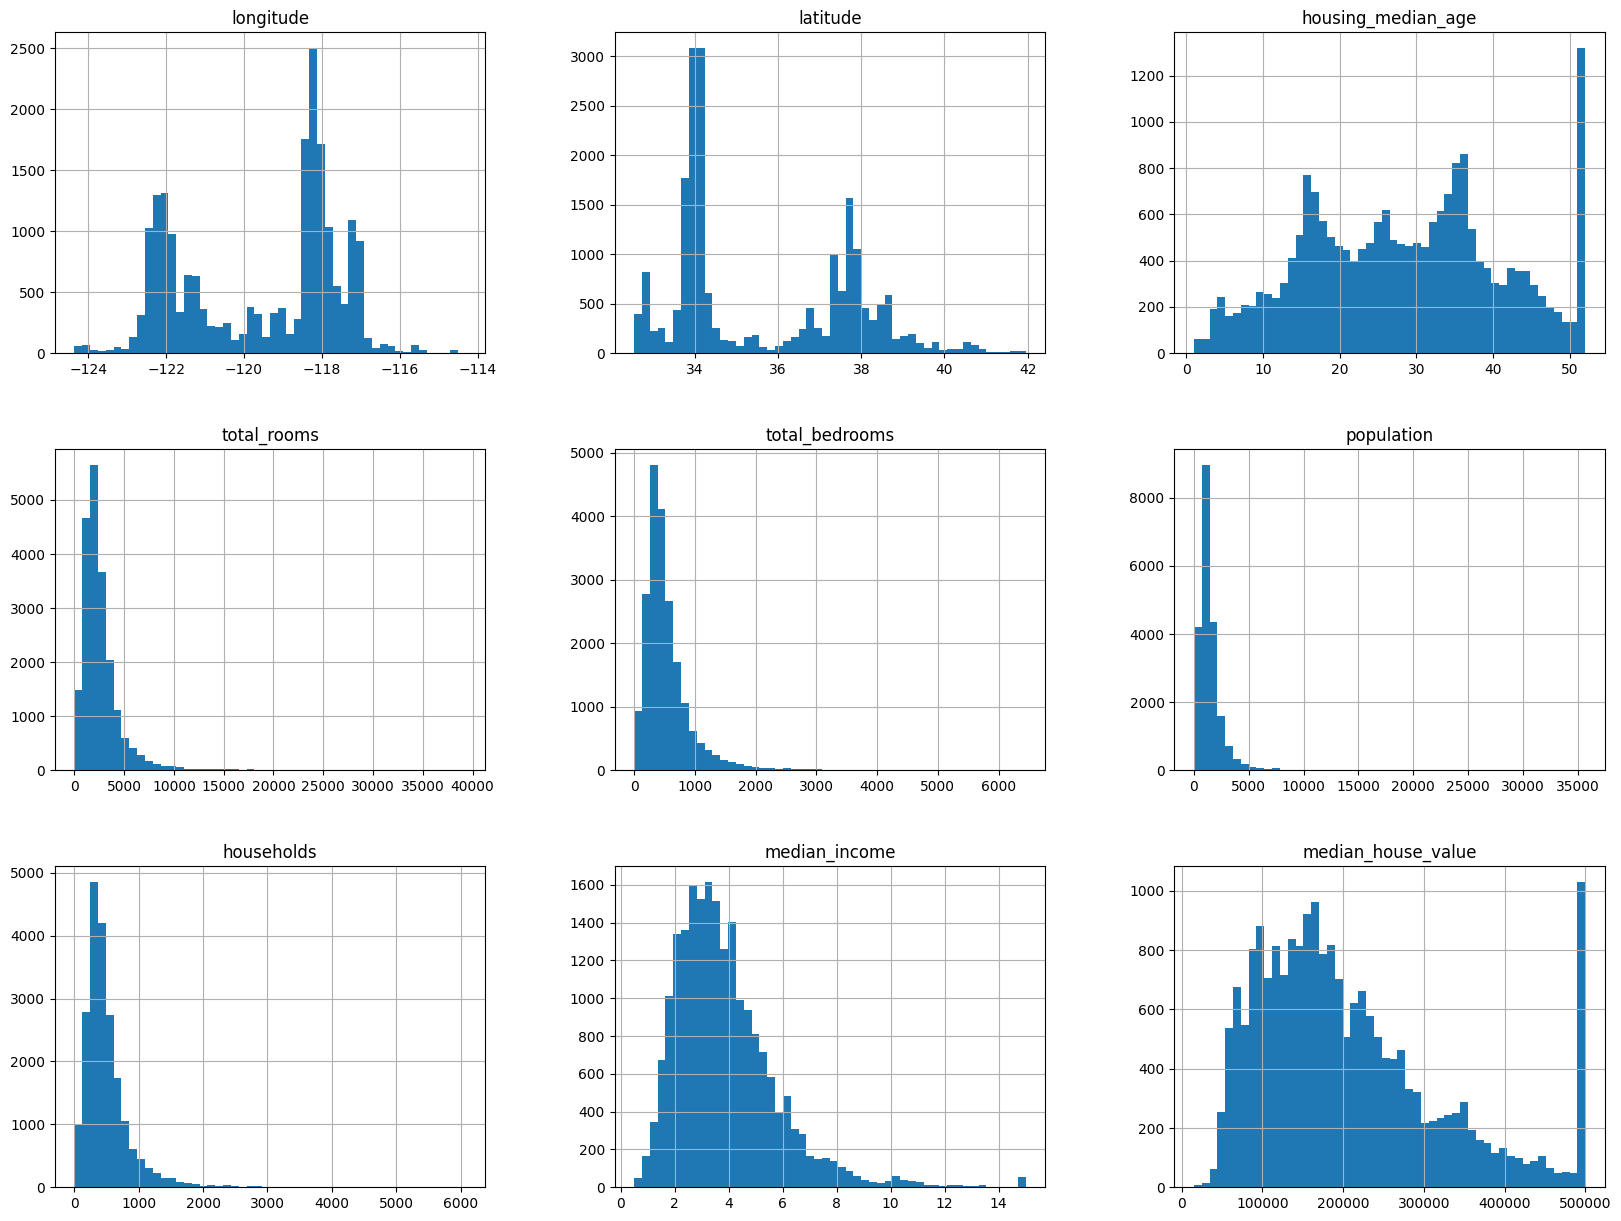

In [79]:
import matplotlib.pyplot as plt

housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

# 3. Create a test set

## 3.1 Random test set

In [80]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

## 3.2 Stratified test set

Suppose experts say that median income is very important feature in predicting housing prices, I'll have to make sure test set is representative of the income categories of the whole dataset.

Since median income is continuous (not categorical), I have to create an income category feature/attribute.

There shouldn't be too many categories(AKA strata), and each category should have sufficient number of rows/instances (to avoid bias in stratum's importance)

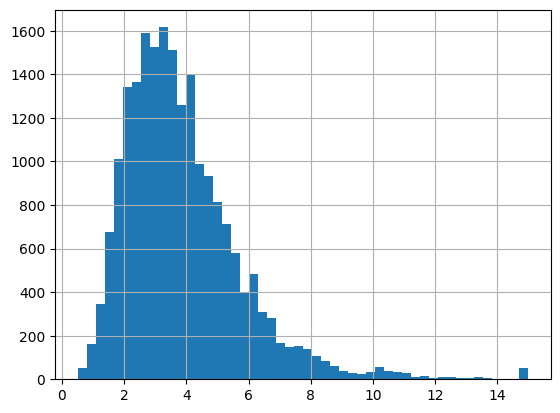

In [81]:
import matplotlib.pyplot as plt

housing_data['median_income'].hist(bins=50)
plt.show()

In [82]:
import numpy as np

housing_data['income_category'] = pd.cut(housing_data['median_income'],
                                         bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                         labels=[1, 2, 3, 4, 5])

<Axes: >

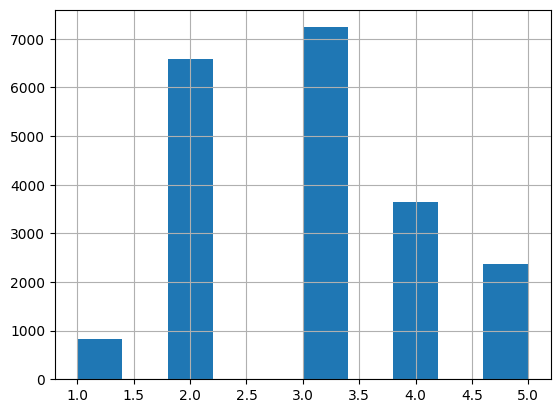

In [83]:
housing_data['income_category'].hist()

### 3.2.1 Use stratified shuffle split

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create an instance/object of the StratifiedShuffleSplit class, which has the method split()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) ## n_splits=1 means split once to create train and test sets

# Use the split() method (takes the dataset and the feauture/column that will be stratified)
    ## Returns 2 lists of indices -- one list contains indices (or rows numbers) that are assigned to the train set, and another contains indices/row numbers that are assgined to the test set
for train_index, test_index in split.split(housing_data, housing_data['income_category']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    ## .loc[<list of indices>] will create a new dataframe that contains only rows at those indices


Look at the proportion of each category in the test set

In [85]:
#Note that strat_train_set and strat_test_set are new dataframes
strat_test_set['income_category'].value_counts()/len(strat_test_set)

,count
income_category,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [86]:
housing_data['income_category'].value_counts()/len(housing_data)

,count
income_category,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


See from above outputs that the proportions of each category in the whole dataset and the test set are the same

Now, I can remove the income_category feature, so that the dataset has the same number of columns once again (back to the original dataset)

In [87]:
for dataframe_i in (strat_train_set, strat_test_set): ## Create a tuple with 2 dataframes inside
    dataframe_i.drop('income_category', axis=1, inplace=True) ## Must specify axis (0 for dropping rows, 1 for dropping columns)
                                                              ## inplace=True means you modify the original dataframe (and not create a new one)


# 4. Data Visualization

## 4.1 Visualizing geographical data on a map

Explore only the training set (and keep the test set a secret) by creating a copy of the training set to play with

In [88]:
housing_vis = strat_train_set.copy()
housing_vis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


Since this is geographical data, I should visualize coordinates

<Axes: xlabel='longitude', ylabel='latitude'>

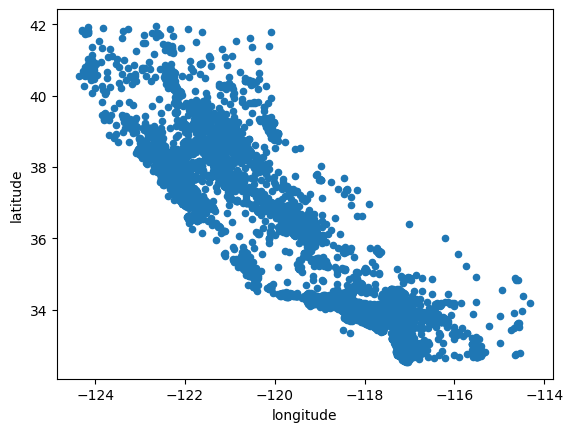

In [89]:
housing_vis.plot(kind='scatter', x='longitude', y='latitude')

We want to see density as well

<Axes: xlabel='longitude', ylabel='latitude'>

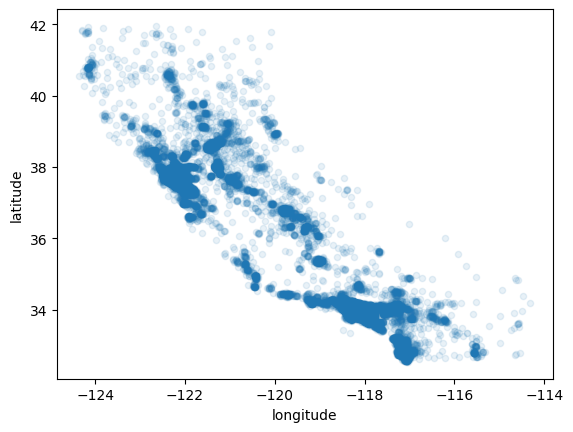

In [90]:
housing_vis.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
## alpha=0.1 to lower opacity, so I can see overlapping points and thus density

Add other features to the circles to visualize them too (population size as circle size `s` and housing price as color `c`, and use the `jet` colormap option for the `cmap` attribute)

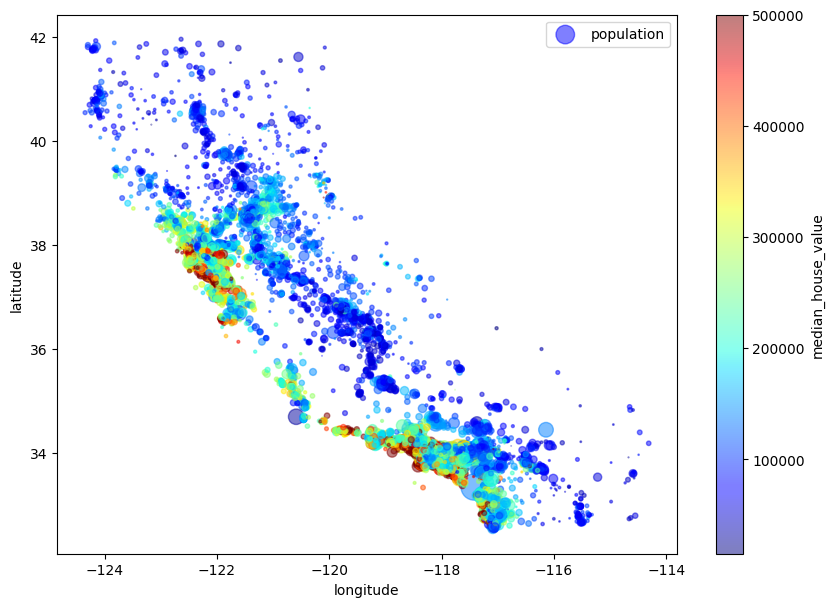

In [91]:
housing_vis.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
                s=housing_vis['population']/100, label='population', figsize=(10, 7),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

## 4.2 Exploring Correlations

Calculate the standard correlation coeff (AKA Pearson's r) between every pair of features using `corr()` after excluding non-numeric columns using `select_dtypes()`

In [92]:
#Exclude non-numeric columns
numeric_cols = housing_vis.select_dtypes(include=['number'])
numeric_cols.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [93]:
corr_matrix = numeric_cols.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [94]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


The correlation coefficient is just to see how strong a linear correlation is. It misses out on other types of non-linear correlations.

Plot every numerical feature against every other numerical feature. Since there are 11 features, there will 11^2 = 121 plots, which is too much. Thus, I focus on the target itself (median_house_value) and the top 3 most linear-correlated features with the target (the median house value) seen from the output above.

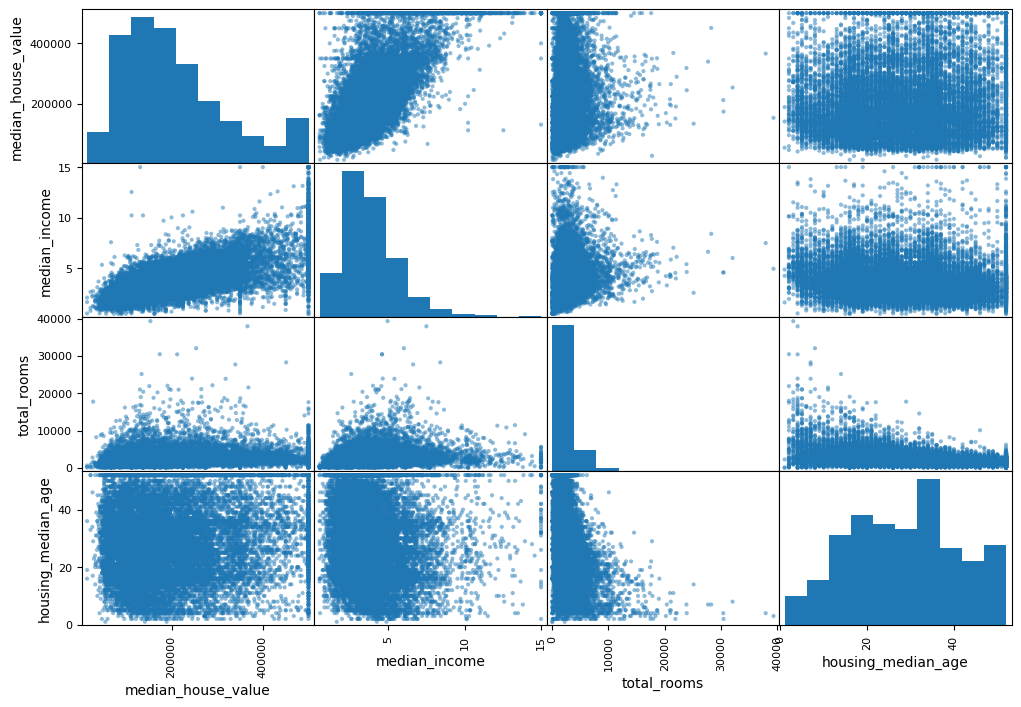

In [95]:
from pandas.plotting import scatter_matrix

features_of_interest = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_vis[features_of_interest], figsize=(12, 8))
plt.show()

From above, the `scatter_marix()` function takes in a dataframe, which is a new dataframe created from selecting just some columns in the older `housing_vis` dataframe. The selection `housing_vis[features_of_interest]` with the list `feature_of_interest` will return a new dataframe with just those columns

Looks like the median_income has the strongest correlation with the median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

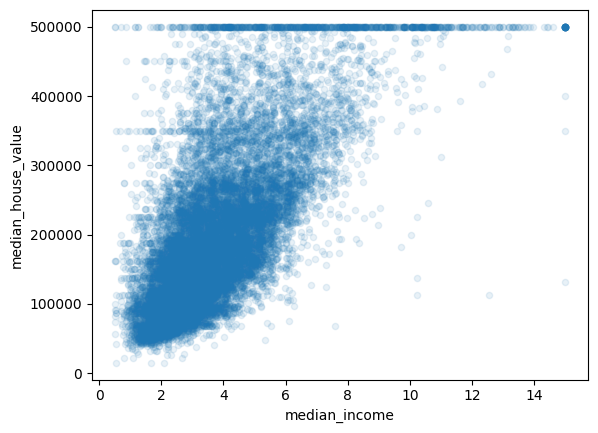

In [96]:
housing_vis.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

From above, see that the correlation is strong, but there are certain horizontal lines like the one at median_house_value of 350000, which might cause some problems

# 5. Feature Engineering

In [97]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Going through the features, we can see that, intuitively, some features aren't useful when used alone. E.g. the total number of rooms (`total_rooms`) in a district is not useful if you don't know how many households (`households`) there are in the district .

To combat this, you can combine many features in a way to show a more useful comparison. E.g. combine `total_rooms` in the district and `households` in a district to form `rooms_per_household`

Even though features like `population` and `household` are already useful, they can be more useful when combined. E.g., they can be combined to get `population_per_household`.

In [98]:
# Combine the features to a new feature/column in the dataframe

# A house with more rooms likely has a higher price
housing_data['rooms_per_household'] = housing_data['total_rooms']/housing_data['households']

# A house with more bedrooms compared to other rooms in the same house likely has a higher price
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms']/housing_data['total_rooms']

# Population per household (how crowded the area is) seems like an interesting feature
housing_data['population_per_household'] = housing_data['population']/housing_data['households']


In [99]:
#Exclude non-numeric columns
numeric_cols = housing_data.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


From the above, we can see that the new feature `rooms_per_household` is more strongly linearly correlated to the target `median_house_value` than the `total_rooms` and `households`. Moreover, a house that has a large proportion of it being bedrooms has a lower price, as we see a strong negative correlation between the new feature `bedrooms_per_room` and the target `median_house_value`

# 6. Data Preparation for the model

Separating the target column


In [100]:
housing_train = strat_train_set.drop('median_house_value', axis=1)
housing_train_labels = strat_train_set['median_house_value'].copy()

housing_test = strat_test_set.drop('median_house_value', axis=1)
housing_test_labels = strat_test_set['median_house_value'].copy()

The `drop()` creates a copy of the data and doesn't affect the `strat_train_set` dataframe

In [101]:
housing_train_labels.head()

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0


In [102]:
housing_test_labels.head()

,median_house_value
5241,500001.0
17352,162500.0
3505,204600.0
7777,159700.0
14155,184000.0


## 6.1 Handle Missing Data

Let's see missing data

In [103]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


From the above, we see that `total_bedrooms` has some missing values (only 16354 non-null values out of 16512 entries/rows)

How to deal with missing data:

- Option 1: Remove rows with missing data (`housing_train.dropna(subset=['total_bedrooms'])`)

- Option 2: Remove the whole column (`housing_train.drop('total_bedrooms', axis=1)`)

- Option 3: Impute the missing data with a certain value (`housing_train['total_bedrooms'].fillna(median, inplace=True`)

## 6.1.1. Impute with Median

In [104]:
from sklearn.impute import SimpleImputer

# Create an instance of the class SimpleImputer
imputer = SimpleImputer(strategy='median')

In [105]:
# SimpleImputer can only work with numerical features
housing_train_numerical = housing_train.drop('ocean_proximity', axis=1)
    ## drop() doens't modify the original housing_train dataframe


In [106]:
# FIt the imputer instance/object to the training data using the fit() method/function
imputer.fit(housing_train_numerical)

SimpleImputer(strategy='median')

After the system goes live, there might be more missing data apart from in the feature `total_bedrooms`, so apply the imputer to all numerical features

In [107]:
# Look at the statistics_ attribute of the SimpleImputer object (which we instantiated and named 'imputer')
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [108]:
# Replacing missing data with the trained median (transform the features with missing data)
X = imputer.transform(housing_train_numerical)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [109]:
# Convert the np array back to pandas dataframe
housing_train_numerical_imputed = pd.DataFrame(X, columns=housing_train_numerical.columns,
                             index=housing_train_numerical.index)

## 6.2 Deal with Categorical Features

In [110]:
# Deal with the categorical, non-numerical features
housing_category = housing_train[['ocean_proximity']]
    ## the double [[]] is used to select out a dataframe (2D), instead of a 1D column that's just a pandas series
housing_category.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


### 6.2.1 Convert Ordinal Categories to Numbers


This doesn't apply much in this case, since the categories here have no ordinal order e.g. `NEAR OCEAN`, `<1H OCEAN`, and `NEAR BAY` have no particular order in what's actually closest to the ocean in terms of `ocean_proximity`

However, in other cases where there is a clear order, such as `low`, `medium`, and `high`, then ordinal encoder like used here is more appropriate than a one-hot encoder (shown later on, and used in this case).

In [111]:
# The categories here are still in useful order (low, medium, high), so they are "ordinal"
    ## OrdinalEncoder is a class
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder class (get an object)
ordinal_encoder = OrdinalEncoder()

# The fit_transform() method learns how to convert the categories to numerical values (fit), and does so (transform)
    ## The fit_transform() method returns a numpy array (stored as housing_category_encoded)
housing_category_encoded = ordinal_encoder.fit_transform(housing_category)
housing_category_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [112]:
# See the categories in the object's categories_ attribute as list containing arrays -- each array is for each one categorical column
    ## Only one array here, since there is only one column that is categorical
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 6.2.2 Converting Nominal Categories to Numbers

Here, since `<1H OCEAN`, `NEAR OCEAN`, and `NEAR BAY` have no clear order, we should use one-hot encoder instead of the ordinal encoder.

In [113]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
category_encoder = OneHotEncoder()

# The method fit_transform() in the OneHotEncoder object (named category_encoder) learns categories in the ocean_proximity column, and transform data into a one-hot binary vector
housing_category_1hot = category_encoder.fit_transform(housing_category)
housing_category_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

From above, notice that the data is in a SciPy sparse matrix instead of a numpy array. A sparse matrix stores only the location of the 1s, so it's an efficient storage of memory.

## 6.3 Custom Data Transformers to add the Combined Features

What are transformers?

Transformers are objects that can transform the data to prepare it for modelling. It can do feature scaling, one-hot encoding or ordinal encoding, and generating new features. Examples of built-in transformers in sci-kit learn include `StandardScaler`, `OneHotEncoder`, `Imputer`, and more.

Transformer objects have two main methods:
- `fit()` -- learns the data (calculates stats like median for `Imputer`, the number of categories for `OneHotEncoder`, and mean and standard deviation for `StandardScaler`. For adding new combined features (in this case), we don't have to learn/calculate anything, so we can just make this method return `self` (the transformer itself)

- `transform()` -- Use the parameters learned in fit() to transform the data and return it

When making a custom transformer, you can create a `fit_transform()` function for convenience.





Using a transformrer to add combined features (that we explored earlier) is better than adding the columns directly (as tried earlier) because:
- Reusability
- Consistency
- Automation
- Using transformers to add combined attributes can be integrated with useful sklearn pipelines and grid search)

In [114]:
housing_train_numerical_imputed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [115]:
# Import classes from sklearn so that it's easier to build custom transformers
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Defining indices of each column in the housing_train_numerical_imputed dataframe above
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Create a custom Tranformer class called CombinedFeaturesAdder to add the combined features (feature engineering)
# Inherit from the BaseEstimator and TransformerMixin classes
class CombinedFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): ## The add_bedrooms_per_room is a hyperparameter (either add or not add this new combined feature)
        self.add_bedrooms_per_room = add_bedrooms_per_room ## default to True (add this new combined feature)

    # All transformers must have the fit() and transform() methods
    def fit(self, X, y=None):
        return self # in this case of adding a combined feature, the transformer doesn't have to learn/calculate anything from the data, so it just returns the transformer itself

    # Transformer takes in a dataframe called input X
    def transform(self, X):
        # Returns an array where you select all rows (:) but for just the column for rooms
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        # Might add the bedrooms_per_room as a new feature (depending on whether input is True or False)
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            #np.c_ is used to concatenate original dataframe X with the new features
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [116]:
# Using the transformer
feature_adder = CombinedFeaturesAdder(add_bedrooms_per_room=False) #choose not to add the bedrooms_per_room feature
housing_train_extra_features = feature_adder.transform(housing_train.values)

In [117]:
# BTW, see that the .values() convert the pandas dataframe to a 2D numpy array
housing_train.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

## 6.4 Feature Scaling

2 Types of Feature Scaling
1. Min-max scaling (Normalization)
- Subtract off the min and then divide by the range (max-min)
- Returns a value between 0 and 1

2. Standardization
- Subtract off the mean and divide by the SD
- Doesn't return a value between 0 and 1, but will have mean of 0 and SD of 1
- Less affected by outliers (good)

We will do the feature scaling in the pipeline (in the next step) itself, and not separately here

## 6.4 Creating a Data Transformation Pipeline

### 6.4.1 Data Pipeline for Numerical Data

Using a data transformation pipeline combines the steps of data preparing for the model, so it's reproducible and consistent.

In [118]:
# Import the Pipeline class
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create an instance of the Pipeline class
    ## it takes in a list of tuples(name-estimator pair) -- an estimator is an object that performs fit() or predict(), and a transformer is a type of estimator
pipeline_for_numerical = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_adder', CombinedFeaturesAdder()),
    ('std_scaler', StandardScaler()),
])

# The pipeline has the same method as the last object
# Here, the pipeline also has the fit_transform() function, since the last object is a transformer
housing_train_numerical = pipeline_for_numerical.fit_transform(housing_train_numerical)

### 6.4.2. Full Data Pipeline (for numerical and categorical data)

In [119]:
# BTW, see the list of column names in the housing_train_numerical_imputed dataframe
list(housing_train_numerical_imputed)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [120]:
from sklearn.compose import ColumnTransformer

# Create 2 lists of column names
numerical_features = list(housing_train_numerical_imputed)
categorical_features = ['ocean_proximity'] # List containing column names, but there is only one column name

# Use the ColumnTransformer object to transform numerical and categorical features separately
# The ColumnTransformer object (named full_pipeline) takes a list of tuples, each tuple being (name, transformer object, list of columns to be transformed)
full_pipeline = ColumnTransformer([
    ('num', pipeline_for_numerical, numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# The ColumnTransformer object can concatenate a dense matrix (np array from pipeline_for_numerical) and a sparse matrix (scipy sparse matrix from OneHotEncoder())
housing_prepared = full_pipeline.fit_transform(housing_train)

In [121]:
type(housing_prepared)

numpy.ndarray

In [122]:
type(housing_train_labels)

pandas.core.series.Series

# 7. Select and Train a Model

## 7.1 Linear Regression Model

### 7.1.1. Linear Regression Training

In [123]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object (untrained model)
lin_reg = LinearRegression()

# The fit() method trains the model with the data
# It takes in input features (housing_prepared np array) and target labels (housing_train_labels pandas series)
lin_reg.fit(housing_prepared, housing_train_labels)

LinearRegression()

### 7.1.2. Linear Regression Evaluation

In [124]:
# Get first 5 rows of training features
some_data = housing_train.iloc[:5]

# Prepare the 5 rows of data using the Pipeline object
some_data_prepared = full_pipeline.transform(some_data) # Just do transform(), not fit_transform, since you already fit() when looking at the whole train set

# Get first 5 rows of training labels
some_labels = housing_train_labels.iloc[:5]

# The LinearRegression object (named lin_reg) has already been trained earlier
# The predict() method returns an array of predicted values based on the features for each of the rows
print(f'Predictions: {lin_reg.predict(some_data_prepared)}')
print(f'Labels: {list(some_labels)}')

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Calculate RMSE

In [125]:
from sklearn.metrics import mean_squared_error

# Generate predictions for all rows in the training data using the trained model
    ## takes in the features data in the training set
    ## returns the predictions of the house price
housing_predictions = lin_reg.predict(housing_prepared)

# Calculate mean squared error
    ## takes in y_true and y_preds
lin_mse = mean_squared_error(housing_train_labels, housing_predictions)

# Modify it a bit to calculate Root Mean Squared Error
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [126]:
housing_train_labels

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


From above, you can see that compared to the house prices, the RMSE of 68627 is very large (very bad)

Since the model is underfitting (can't make good predictions), we can try a more complex model like Decision Tree.

## 7.2 Decision Tree Model

### 7.2.1 Decision Tree Training

In [127]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
tree_reg = DecisionTreeRegressor()

# Train it with the features and targets in the training set
tree_reg.fit(housing_prepared, housing_train_labels)

DecisionTreeRegressor()

### 7.2.2. Decision Tree Evaluation

In [128]:
# Create predictions using predict() method of the object
housing_predictions = tree_reg.predict(housing_prepared)

# Calculate MSE (takes in y_true and y_preds)
tree_mse = mean_squared_error(housing_train_labels, housing_predictions)

# Calculate RMSE
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

From above, with a RMSE of 0, you can see that the model has overfitted the training data.

### 7.2.3. Better Evaluation using Cross-Validation

In [129]:
# Import the function cross_val_score
    ## returns an array of scores for each fold
from sklearn.model_selection import cross_val_score

# Using the function cross_val_score()
    # returns an array of scores, which is the evaluation metric you specify (e.g. accuracy for classification, mse for regression, r2 for regression)
scores = cross_val_score(tree_reg, housing_prepared, housing_train_labels,  # takes in the model object, 2D array of features, target vector, score type (type of eval metric), and cv=no. of folds
                         scoring='neg_mean_squared_error', cv=10)
                         # We use neg_mean_squared_error since to be compatible with sklearn, a higher score means it's better. However, the MSE is a loss function, so a lower MSE is actually better, so we need to calculate the neg_mean_squared_error to make it compatible with sklearn usage

# However, when reporting the RMSE, we need to get a positive value of the MSE first (not neg)
tree_rmse_scores = np.sqrt(-scores)

In [130]:
# Function to display the scores
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}')

In [131]:
# Display the RMSE of the Decision Tree model
display_scores(tree_rmse_scores)

Scores: [72184.30449156 70645.02446653 67810.6615308  73223.41009783
 70464.65860684 77942.77531574 72404.09971408 72842.20462812
 67218.65395684 70958.82519095]
Mean: 71569.46179992787
Standard Deviation: 2855.7898439945147


From above, the decision tree has a mean score (AKA mean RMSE) of 71548

In [132]:
# Compute scores for Linear Regression Model for comparison
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_train_labels,
                             scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

In [133]:
# Display the RMSE of a Linear Regression Model
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.3282098180694


Since the score here is RMSE, a higher RMSE is worse. The mean score (mean RMSE) for Linear Regression is lower than the mean RMSE for Decision Tree, so Linear Regression is actually better than a Decision Tree here!

## 7.3. Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

# Train Random Forest Model
forest_reg.fit(housing_prepared, housing_train_labels)

# Generate predictions using the features data
housing_predictions = forest_reg.predict(housing_prepared)

# Calculate the MSE
forest_mse = mean_squared_error(housing_train_labels, housing_predictions)

# Calculate the RMSE
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18685.986279218003)

In [135]:
# Calculate scores using cross_val_score()
# Again, to be compatible with sklearn, use a neg_mean_squared_error, where a higher score is now better (like other sklearn scores)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_train_labels,
                             scoring='neg_mean_squared_error', cv=10)

# Convert it back to MSE (higher is worse), and then calculate RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

# Display RMSE for Random Forest
display_scores(forest_rmse_scores)

Scores: [51378.963706   49112.06814882 46928.23953875 51925.29494491
 47406.79828894 51723.02988732 52333.12827641 49769.47005181
 48583.90375348 54167.38302263]
Mean: 50332.82796190728
Standard Deviation: 2220.073441657134


From the above, we see that the Random Forest model has the lowest mean RMSE of all 3 models (linear regression, decision tree, random frest) of 50369. This means it's the best model, which we will use to fine-tune (hyperparameter tuning) in the next step.

# 8. Fine-tune the Model

# 8.1 Grid Search

To find a good combination of hyperparameter values, you can use `GridSearhCV` to search for it. It will use cross-validation to evaluate all possible combinations of hyperparameter values and give you the best one.

In [136]:
from sklearn.model_selection import GridSearchCV

# A list of dictionaries for what hyperparameters to test, and which values to try for each one
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # it will try 3 x 4 = 12 combinations in this dict first
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]} # and then it will try 2 x 3 = 6 combinations in this second dict (total = 12 + 6 = 18 combinations)
]

# Create a random forest model object
forest_reg = RandomForestRegressor()

# Create a GridSearchCV object (to search and perform CV)
grid_search = GridSearchCV(
    forest_reg,
    param_grid, # it will try every combination in this param_grid
    cv=5, # for each combination, perform 5-fold cross-validation
    scoring='neg_mean_squared_error',
    return_train_score=True # keep track of train scores to check for overfitting
)

# Running the search
    # Here, it's clear why we have been using neg_mean_squared_error
    # --> it's because the GridSearchCV will select the best hyperparameter values combination based on the highest score, so we can't just use the MSE (where higher MSE is worse)
grid_search.fit(housing_prepared, housing_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [137]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since the hyperparameter value 30 is the maximum values in the options for hyperparameter values that we included in the n_estimator array, we should try searching again by adjusting this n_estimator array to include larger values, and see if the score continues to improve

In [138]:
# Or can get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [139]:
# Evaluation scores
cv_result = grid_search.cv_results_
for mean_score, params in zip(cv_result['mean_test_score'], cv_result['params']):
    print(np.sqrt(-mean_score), params)

64141.169809574676 {'max_features': 2, 'n_estimators': 3}
55311.53385595966 {'max_features': 2, 'n_estimators': 10}
52755.34226805131 {'max_features': 2, 'n_estimators': 30}
60809.3388688209 {'max_features': 4, 'n_estimators': 3}
53001.3863845234 {'max_features': 4, 'n_estimators': 10}
50663.656570251784 {'max_features': 4, 'n_estimators': 30}
60514.850251100484 {'max_features': 6, 'n_estimators': 3}
52228.343768746505 {'max_features': 6, 'n_estimators': 10}
50127.97995764348 {'max_features': 6, 'n_estimators': 30}
58642.37934562266 {'max_features': 8, 'n_estimators': 3}
52257.9859924851 {'max_features': 8, 'n_estimators': 10}
50028.864974488126 {'max_features': 8, 'n_estimators': 30}
61751.37913435323 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54558.34876463175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60408.187273791205 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52119.69429360513 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## 8.2 Randomized Search

When the hyperparameter search space is large, using Randomized Search is better than GridSearch.

Benefits:
- it will explore a lot of different values for each hyperparameter (instead of just a few)
- you can have more control over the computing budget allocated to the hyperparameter search by setting the number of iterations

Another way to fine-tune is to use Ensemble Methods (combining models that perform best). This will be explored later.

#9. Analyzing Feature Importance (looking at Best Models and errors)

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.75984311e-02, 6.02946486e-02, 4.50273416e-02, 1.68327958e-02,
       1.52069334e-02, 1.56050598e-02, 1.41780197e-02, 3.79795508e-01,
       5.12363707e-02, 1.10334910e-01, 5.19243398e-02, 5.62443620e-03,
       1.55998199e-01, 5.17391265e-05, 3.80536885e-03, 6.48589912e-03])

In [141]:
# Look at ther transformers in the pipeline
full_pipeline.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('feature_adder', CombinedFeaturesAdder()),
                 ('std_scaler', StandardScaler())]),
 'cat': OneHotEncoder()}

In [142]:
# See that the categorical transformer is the OneHotEncoder
cat_encoder = full_pipeline.named_transformers_['cat']
cat_encoder

OneHotEncoder()

In [143]:
# Look at the categories of this OneHotEncoder object
print(cat_encoder.categories_)
print(type(cat_encoder.categories_))

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
<class 'list'>


From above, see that the `.categories_` returna a list of arrays, each array being the categories

In [144]:
# The first element in the list above is an array of categorical values for the ocean_proximity column
# Convert the an array of category names into a list for further use
list(cat_encoder.categories_[0])

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [145]:
# Putting the above steps together:
extra_features = ['rooms_per_household', 'population_per_household', 'bedroosm_per_room']

# Extract out the categorical encoder used (which is the OneHotEncoder)
categorical_encoder = full_pipeline.named_transformers_['cat']
# Convert the category names for the categorical feature/column into a list
categorical_one_hot_features = list(categorical_encoder.categories_[0])

# All features
features = numerical_features + extra_features + categorical_one_hot_features

# zip() combines the feature importance scores with their corresponding feature names into pairs (tuples)
# then we sort in descending order
sorted(zip(feature_importances, features), reverse=True)

[(np.float64(0.3797955077563366), 'median_income'),
 (np.float64(0.1559981988101765), 'INLAND'),
 (np.float64(0.11033490956844944), 'population_per_household'),
 (np.float64(0.06759843111615581), 'longitude'),
 (np.float64(0.06029464856627949), 'latitude'),
 (np.float64(0.051924339816407004), 'bedroosm_per_room'),
 (np.float64(0.05123637070545225), 'rooms_per_household'),
 (np.float64(0.04502734159128474), 'housing_median_age'),
 (np.float64(0.016832795827889678), 'total_rooms'),
 (np.float64(0.015605059845657611), 'population'),
 (np.float64(0.015206933435418662), 'total_bedrooms'),
 (np.float64(0.014178019663236036), 'households'),
 (np.float64(0.006485899120492008), 'NEAR OCEAN'),
 (np.float64(0.005624436204823049), '<1H OCEAN'),
 (np.float64(0.0038053688454272195), 'NEAR BAY'),
 (np.float64(5.173912651394298e-05), 'ISLAND')]

With the info above, we can drop some less useful features

# 10. Evaluating the Model on the Test Set

## 10.1. Evaluating the RMSE of the Final Model

In [146]:
# Use the best hyperparameter value combination from GridSearchCV
final_model = grid_search.best_estimator_

# Create dataframes for the test features (X) and test targets (y)
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# Transform the test features data to prepare it for modelling
# Use transform() (not fit_transform, since we only fit once for the training set and just simply use it here)
X_test_prepared = full_pipeline.transform(X_test)

# Make predictions based on the test features (that have been transformed)
final_predictions = final_model.predict(X_test_prepared)

# Calculate MSE (takes in y_true and y_preds)
final_mse = mean_squared_error(y_test, final_predictions)

# Calculate RMSE
final_rmse = np.sqrt(final_mse)

final_rmse

np.float64(47944.81642229465)

## 10.2 Determine the Precision of the Evaluation

If the RMSE is just a bit lower than that of the current model in production, we can't be sure if that improvement is due to chance or not. That's why we need to calculate the confidence interval. A 95% confidence interval means that if you repeat the experiment 100 times, the true value will fall in that interval 95 times out of 100.

In [147]:
# Get 95% confidence interval of the error
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2

# Use stats.t.interval() to calculate the confidence interval using the t-distribution
    ## takes in confidence interval, degrees of freedom (which is n-1 where n is the sample size), location parameter (location of the centre of the distribution), scale parameter (variation of the data -- for confidence interval, this is usually the standard error of the mean SEM)
np.sqrt(stats.t.interval(confidence,
                         len(squared_errors) -  1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45945.73819741, 49863.81438508])

# 11. Deploy

In [148]:
pip freeze > requirements.txt

In [149]:
import joblib

final_model = grid_search.best_estimator_

# Save the final model
joblib.dump(final_model, 'final_model.pkl')

# Save the full pipeline
joblib.dump(full_pipeline, 'full_pipeline.pkl')

['full_pipeline.pkl']

In [151]:
import pandas as pd

# Select only the numerical columns
numerical_columns = housing_data.select_dtypes(include=['number'])

# Get descriptive statistics including min and max
description = numerical_columns.describe()

# Print the min and max for each numerical column
print("Minimum values for numerical features:")
print(description.loc['min'])

print("\nMaximum values for numerical features:")
print(description.loc['max'])

Minimum values for numerical features:
longitude                    -124.350000
latitude                       32.540000
housing_median_age              1.000000
total_rooms                     2.000000
total_bedrooms                  1.000000
population                      3.000000
households                      1.000000
median_income                   0.499900
median_house_value          14999.000000
rooms_per_household             0.846154
bedrooms_per_room               0.100000
population_per_household        0.692308
Name: min, dtype: float64

Maximum values for numerical features:
longitude                     -114.310000
latitude                        41.950000
housing_median_age              52.000000
total_rooms                  39320.000000
total_bedrooms                6445.000000
population                   35682.000000
households                    6082.000000
median_income                   15.000100
median_house_value          500001.000000
rooms_per_household      